<a href="https://colab.research.google.com/github/tassoares/Fuzzy_Quality_Control/blob/main/APLICA%C3%87%C3%83O_DA_L%C3%93GICA_FUZZY_PARA_CONTROLE_DA_QUALIDADE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aplicação da Lógica Fuzzy para Controle de Qualidade**

**Discente: Thays Soares** 

Disciplina: Inteligência Artificial

Engenharia da Computação do IFMT.

03 de Novembro de 2022 

---
**Introdução**

Produtos manufaturados requerem uma análise qualitativa antes de seu envio aos  clientes, uma vez que sua aplicabilidade final precisa ser assegurada.É comum observar em fábricas do mundo inteiro a prática de inspeções volantes que se estendem, em geral, ao longo das linhas produtivas. Essa prática busca o seguimento das especificações estabelecidas em normas ou pelos clientes finais e é realizada por pessoal qualificado e com conhecimento sobre o produto [2].


**Produto e Especificações**
Considerando um produto a ser analisado, temos um tipo de botão. Sendo popular na fabricação de painéis elétricos. 

* [Botões Giratórios](https://drive.google.com/file/d/1nTBWnvcAisQCASMfIMT34AJkwAwik28w/view?usp=share_link)


Este grupo de produtos consiste em acionadores que necessitam de uma força perpendicular ao painel para que o sistema seja acionado e de um toque aplicado no sentido horário para que o mesmo retorne a posição inicial, desligando o sistema. Imagem com link no tópico deste parágrafo.

Os botões giratórios utilizam como estrutura básica um corpo, plástico ou metálico, que aloja uma mola de torção, um acionador plástico e travas movimentadas por uma mola de compressão; uma roseta, responsável por conter este conjunto dentro do corpo e uma tecla com ranhuras nas bordas para acilitar a aplicação do torque pelo usuário, esta tecla, em geral, possui o desenho de uma seta indicando o sentido de desligamento do sistema [1].

Uma vez que os testes aplicáveis às unidades de contato são realizados por máquinas visando assegurar o cumprimento das especificações elétricas estabelecidas em normas, nos deteremos aos testes aplicáveis ao botão, que são realizados pelo inspetor da qualidade [2].



---


**Antecedentes (entradas)**
> **Força de Entrada** - representando a força necessária para acionamento do
botão;
>> Universo (intervalo de valores nítidos/*crisp*): 0 a 10 e

>> Conjunto difuso (valores difusos): baixa, média, alta

> **Torque de saída** - representa o torque necessário para fazer o botão
retornar à posição inicial;
>> Universo (intervalo de valores nítidos/*crisp*): 0 a 10

>> Conjunto difuso (valores difusos): baixa, média-baixa, média-alta, alta

> **Velocidade de Saída** - consiste na velocidade em que o botão volta
à sua posição inicial após o torque aplicado.
>> Universo (intervalo de valores nítidos/*crisp*): 0 a 10

>> Conjunto difuso (valores difusos): baixa, média-baixa, média, alta

**Cosequentes (saídas)**
* **Situação do Produto**

---
Considerando a saída do sistema fuzzy:

* Aprovado1 que representa a situação em que o produto supera as especificações;
* Aprovado2 que representa a situação em que o produto atende às especificações;
* Aprovado3 que representa a situação em que o produto atende parcialmente às
especificações apresentando falhas não críticas (atende pelo menos às características especiais);
* Reprovado que representa a situação em que o produto não atende às especificações críticas (não atender às características especiais).

### **Instalação e importações das bibliotecas**

In [ ]:
!pip install networkx==2.3
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

### **Antecedentes e consequente**

In [ ]:
# Criando as váriaveis de entrada do problema
forca = ctrl.Antecedent(np.arange(1, 11, 1), 'Força de Entrada')
torque = ctrl.Antecedent(np.arange(1, 11, 1), 'Torque de Saída')
velocidade = ctrl.Antecedent(np.arange(1, 11, 1), 'Velocidade de Saída')

In [ ]:
from skfuzzy.defuzzify.defuzz import centroid
# Criando váriavel de saída do problema
situação = ctrl.Consequent(np.arange(1, 11, 1), 'Situação do Produto', defuzzify_method='centroid')

### **Membership functions**

In [ ]:
# Cria automaticamente o mapeamento entre valores nítidos e difusos 
# usando uma função de pertinência padrão (triângulo)

#forca.automf(number=3, names=['baixa', 'média', 'alta'])
#torque.automf(number=4, names=['baixa', 'média-baixa', 'média-alta', 'alta'])
#velocidade.automf(number=4, names=['baixa', 'média-baixa', 'média', 'alta'])

In [ ]:
# Cria as funções de pertinência padrão (triângulo)
forca['baixa'] = fuzz.trapmf(forca.universe, [0, 1, 1, 4])
forca['média'] = fuzz.trimf(forca.universe, [2, 5, 8])
forca['alta'] =  fuzz.trimf(forca.universe,[6, 10, 10])

torque['baixa'] = fuzz.trapmf(torque.universe, [1, 1, 1, 4])
torque['média-baixa'] = fuzz.trimf(torque.universe, [2, 4, 7])
torque['média-alta'] = fuzz.trimf(torque.universe, [4, 6, 8])
torque['alta'] = fuzz.trimf(torque.universe, [7, 9, 9])

velocidade['baixa'] = fuzz.trimf(velocidade.universe, [1, 1, 4])
velocidade['média-baixa'] = fuzz.trimf(velocidade.universe, [1, 3, 5])
velocidade['média'] = fuzz.trimf(velocidade.universe, [3, 6, 8])
velocidade['alta'] = fuzz.trimf(velocidade.universe, [6, 9, 10])

In [ ]:
# Estas quatro possíveis situações são os conjuntos fuzzy para a saída.
situação['reprovado'] = fuzz.trimf(situação.universe,[1, 1, 4])
situação['aprovado3'] = fuzz.trimf(situação.universe, [1, 4, 6])
situação['aprovado2'] = fuzz.trimf(situação.universe,[4, 6, 8])
situação['aprovado1'] = fuzz.trimf(situação.universe,[6, 9, 9])

### **Mostrando graficamente as funções de partinência criadas**

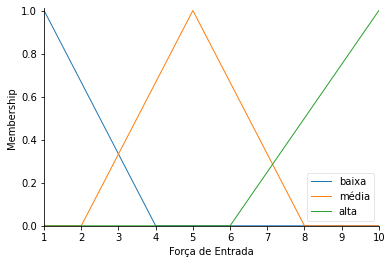

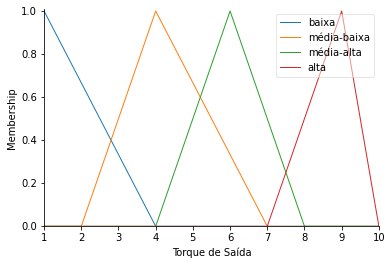

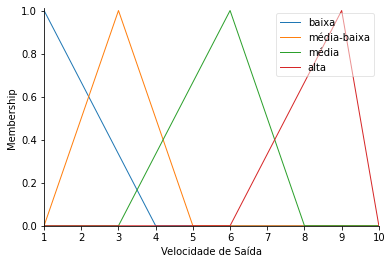

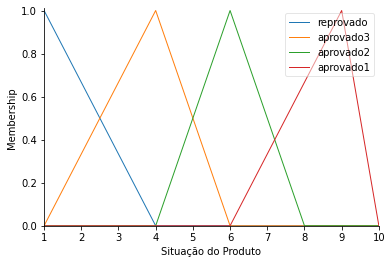

In [ ]:
forca.view()
torque.view()
velocidade.view()
situação.view()

### **Criando as regras de decisão difusas**

In [ ]:
# Nesta regra vemos que se o produto for capaz de responder de forma ideal.
rule1 = ctrl.Rule(forca['alta'] & torque['alta'] & velocidade['alta'], situação['aprovado3'])

# A regra 2 nos mostra a pior situação para o produto em questão.
rule2 = ctrl.Rule(forca['alta'] & torque['baixa'] & velocidade['baixa'], situação['reprovado'])

# Com esta combinação de entradas o produto supera as especificações e é classificado como Aprovado1.
rule3 = ctrl.Rule(forca['baixa'] & torque['alta'] & velocidade['alta'], situação['aprovado1'])

# Nesta situação o botão atende às expectativas e pode ser vendido para qualquer cliente e aplicação.
rule4 = ctrl.Rule(forca['baixa'] & torque['média-alta'] & velocidade['alta'], situação['aprovado2'])

### **Criando e simulando um controlador nebuloso**

In [ ]:
situacao_ctrl = ctrl.ControlSystem([rule1,rule2,rule3])

In [ ]:
situacao_sim = ctrl.ControlSystemSimulation(situacao_ctrl)

In [ ]:
# Entrando com alguns valores para qualidade
situacao_sim.input['Força de Entrada'] = 8
situacao_sim.input['Torque de Saída'] = 8
situacao_sim.input['Velocidade de Saída'] = 8

# Computando o resultado
situacao_sim.compute()

### **Mostrando graficamente**

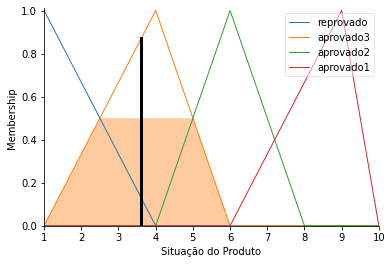

In [ ]:
situação.view(sim=situacao_sim)

### **Referência**

[1] CARNEIRO, Raphael S.; NEDJAH, Nadia; DE MACEDO MOURELLE, Luiza. Aplicaςão da Lógica Fuzzy para Controle da Qualidade. Mecánica Computacional, v. 29, n. 93, p. 9125-9151, 2010.

[2] Normas técnicas de produto: IEC60529, IEC60947, VDE0660, VDE0110, DIN40050 e
NBR6146, 2010.